Categories of Clothing:       
Upper Wear:  
1.T-Shirts  
2.Shirts  
3.Hoodies    
4.Sweaters      
5.Jackets       
6.Blazers          

Lower Wear:            
7.Jeans    
8.Formal Pants              
9.Joggers               
10.Shorts     

Accessories:          
11.Sneakers        
12.High Heels          
13.Boots         
14.Sandals/Flip-flops        
15.Hats        
16.Watches          
17.Handbags/Purses            

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Clothing Classifications

/content/drive/My Drive/Clothing Classifications


In [ ]:
doc(search_images_ddg)

In [ ]:
clothing_labels = {
    "Upper Wear": [
        "T-Shirts",
        "Shirts",
        "Hoodies",
        "Sweaters",
        "Jackets",
        "Blazers"
    ],
    "Lower Wear": [
        "Jeans",
        "Formal Pants",
        "Joggers",
        "Shorts"
    ],
    "Accessories": [
        "Sneakers",
        "High Heels",
        "Boots",
        "Sandals",
        "Hats",
        "Watches",
        "Handbags"
    ]
}

In [ ]:
data_path = "data"

In [ ]:
for category, items in clothing_labels.items():
  first_item=items[0]
  images=search_images_ddg(first_item)
  print(f"category: {category} | No of images : {len(images)} | one image url: {images[180]}")

category: Upper Wear | No of images : 200 | one image url: https://blazerdepot.com/mens_blazer_pix/augustagreenblazerwithemblem.jpg
category: Lower Wear | No of images : 200 | one image url: https://www.denimlabo.com/wpapp/wp-content/uploads/2023/01/PC-about%E3%83%B4%E3%82%A3%E3%83%B3%E3%83%86%E3%83%BC%E3%82%B8banner-scaled.jpg
category: Accessories | No of images : 200 | one image url: https://ug.jumia.is/unsafe/fit-in/500x500/filters:fill(white)/product/20/760622/1.jpg?7687


In [ ]:

if not os.path.exists(data_path):
    os.mkdir(data_path)

def download_and_shuffle_images(main_category, sub_category, search_queries, max_images_per_query=100):
    main_category_path = f"{data_path}/{main_category}"
    if not os.path.exists(main_category_path):
        os.mkdir(main_category_path)

    sub_category_path = f"{main_category_path}/{sub_category}"
    if not os.path.exists(sub_category_path):
        os.mkdir(sub_category_path)

    all_images = []

    for query in search_queries:
      try:
          max_results = 200 if len(search_queries) == 1 else max_images_per_query
          image_urls = search_images_ddg(query, max_results)

          print(f"Query: {query} | No. of Images Found: {len(image_urls)}")  # Debugging line
          print(image_urls[:5])  # Print the first 5 URLs for verification

          all_images.extend(image_urls)
      except Exception as e:
          print(f"Error in fetching images for {query}: {e}")  # Print error if any
          continue

    #shuffling the images so that models don't overfit
    random.shuffle(all_images)


    download_images(sub_category_path, urls=all_images)


for main_category, items in clothing_labels.items():
    for item in items:
        if item in  ["High Heels","Handbags"]:
            # accessories only needed for women
            search_queries = [f"{item} for women"]
        else:

            search_queries = [f"{item} for men", f"{item} for women"]


        download_and_shuffle_images(main_category, item, search_queries, max_images_per_query=100)

print("Image download complete. All images shuffled and stored in respective folders.")

Query: T-Shirts for men | No. of Images Found: 100
['https://images-na.ssl-images-amazon.com/images/I/71QfXz1k1GL._AC_UL1500_.jpg', 'https://ae01.alicdn.com/kf/HTB1sCVuwER1BeNjy0Fmq6z0wVXap/Fitness-False-Pocket-T-Shirt-Men-Designer-Clothes-Cross-Flag-Leather-TShirts-Male-Military-Casual-T.jpg', 'https://i5.walmartimages.com/asr/62601219-9ad8-4963-979b-0f2717b3d42f.c29561ade26b4ef399aed08a9c85a00b.jpeg', 'https://i5.walmartimages.com/asr/7ffec616-12c7-42df-ad9c-c63164d980b6_1.2eafd147c4ac5e7364d0004c1ae9c423.jpeg', 'https://i5.walmartimages.com/seo/Fruit-of-the-Loom-Men-s-Soft-Short-Sleeve-Lightweight-V-Neck-T-Shirt-2-Pack-Sizes-S-3XL_b7e1280e-5f01-4a8f-a0dc-d65bc45a74f3_1.a4f8c4a38f6774a50f21741f823a5d43.jpeg']
Query: T-Shirts for women | No. of Images Found: 100
['https://i.pinimg.com/736x/79/0f/4c/790f4cce1ea96b6b910e2e065b00a4d6.jpg', 'https://i5.walmartimages.com/asr/b9980a80-7604-4915-89bf-c922d163414f_1.bd6499a6f43f781cc7d770037e7d3cde.jpeg', 'https://i5.walmartimages.com/asr/e21

In [ ]:
image_files = get_image_files(data_path)

# Verify images and find any corrupted ones
failed_images = verify_images(image_files)

# Print the number of failed images
print(f"Total Corrupted Images Found: {len(failed_images)}")


Total Corrupted Images Found: 480


In [ ]:
# Delete the corrupted images
failed_images.map(Path.unlink)

print("All corrupted images removed successfully.")

All corrupted images removed successfully.


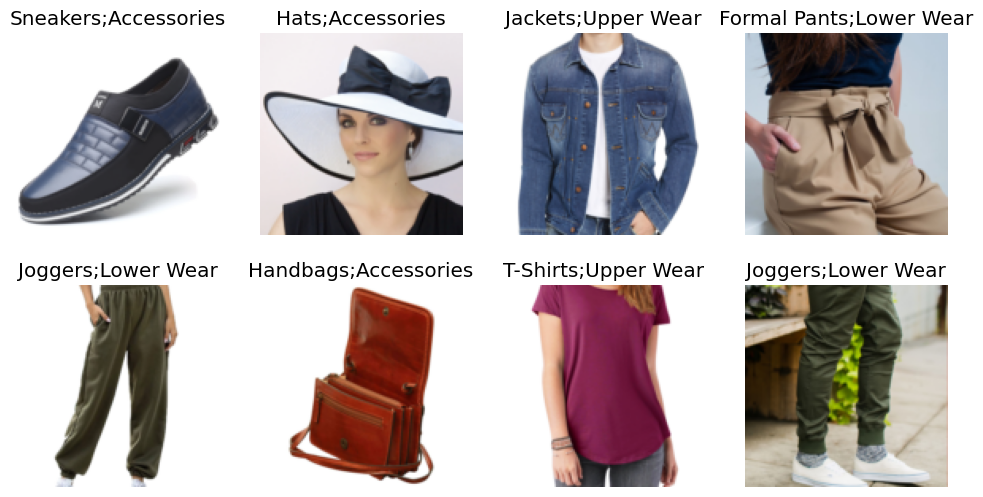

In [ ]:

def get_labels_with_category(path):
    parts = list(path.parent.parts[-2:])  # Extract the last two folder names (Main Category, Item)


    return f"{parts[1]};{parts[0]}"

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Single category classification
    get_items=get_image_files,           # Get all images recursively
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # 90-10 train-validation split
    get_y=get_labels_with_category,     # Use the modified function for labels
    item_tfms=Resize(128)               # Resize images for uniformity
)


dls = dblock.dataloaders(data_path, bs=bs)

dls.train.show_batch(max_n=8, nrows=2)


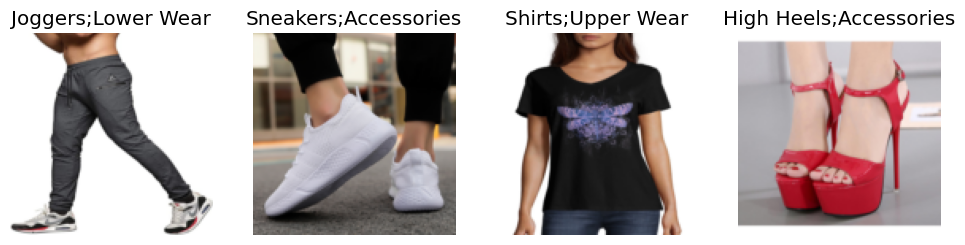

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

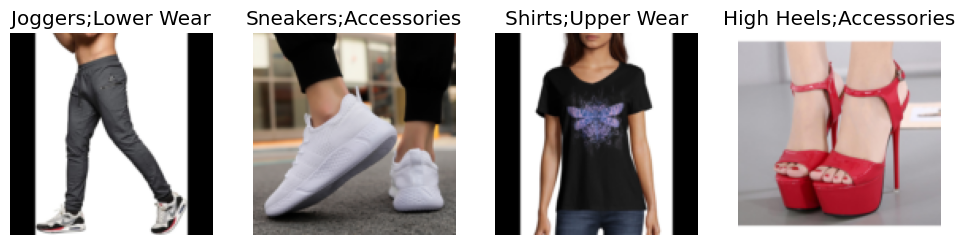

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

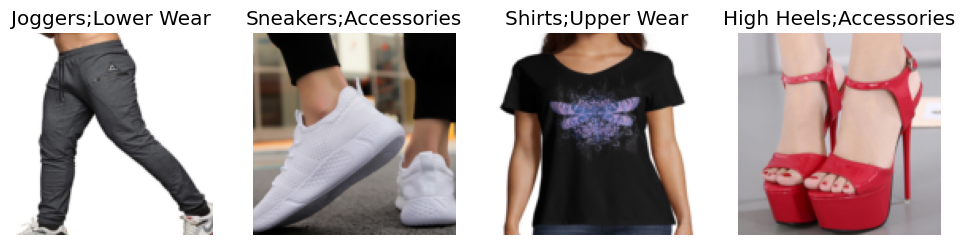

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

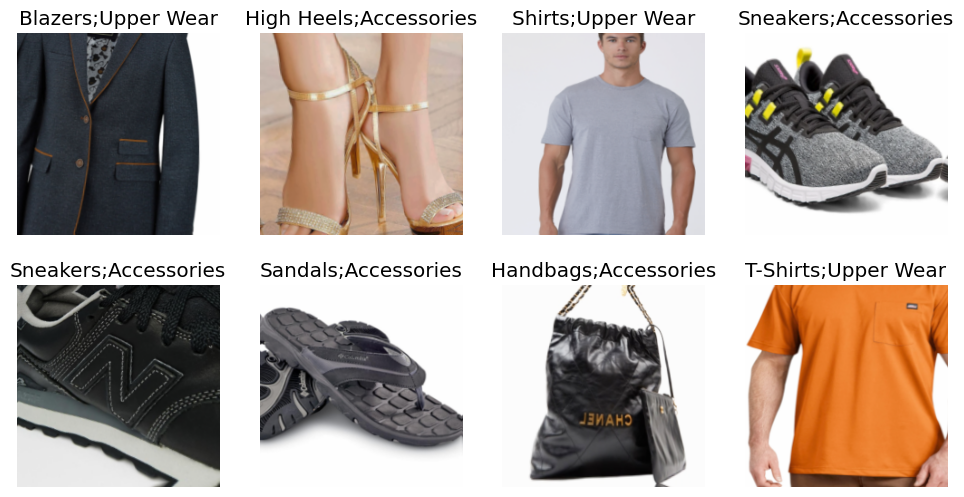

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
dataloader_path="dataloaders"
if not os.path.exists(dataloader_path):
    os.mkdir(dataloader_path)

In [ ]:
torch.save(dls, "/content/drive/My Drive/Clothing Classifications/dataloaders/clothings_dataloader_v1.pkl")

In [ ]:
while True:
  pass

KeyboardInterrupt: 

In [ ]:
doc(vision_learner)

,Type,Default,Details,
dls,,,,
arch,,,,
normalize,bool,True,,
n_out,NoneType,None,,
pretrained,bool,True,,
weights,NoneType,None,,
loss_func,NoneType,None,,
opt_func,function,Adam,,
lr,float,0.001,,
splitter,NoneType,None,,
